In [4]:

import sqlalchemy
#inslallation of pymysql
#!pip install pymysql

In [5]:
import pymysql

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
#connection created in between sql and python 
engine = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/powerbi')

In [9]:
#load customers, purchase, products table from sqlDB
customers = pd.read_sql_table("customers",engine)
purchase = pd.read_sql_table("purchase",engine)
products=pd.read_sql_table("products",engine)


In [10]:
#head values of purchase table 
purchase.head()

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID
0,5001,3,333.45,01-01-2024,3001,208,159
1,5002,3,69.94,01-01-2024,3002,207,178
2,5003,1,586.91,01-01-2024,3003,203,260
3,5004,5,510.38,01-01-2024,3004,210,577
4,5005,2,165.78,01-01-2024,3005,206,987


In [48]:
products.head()

,productid,productname,productcategory
0,201,Air Conditioner,Home Appliances
1,202,Blender,Home Appliances
2,203,Camera,Electronics
3,204,Coffee Maker,Home Appliances
4,205,Electric Kettle,Home Appliances


In [49]:
customers.head()

,customerid,customername,country
0,3001,Chad Reyes,Norfolk Island
1,3002,Melissa Wiley,Greece
2,3003,Christopher Fry,Pakistan
3,3004,Misty Mcguire,Sweden
4,3005,Monique Duarte,Iran


In [11]:
#null values count in purchase table
purchase.isnull().count()

PurchaseID          1000
PurchaseQuantity    1000
PurchasePrice       1000
PurchaseDate        1000
customerid          1000
ProductID           1000
TransactionID       1000
dtype: int64

In [12]:
#check shape of dataframe
purchase.shape

(1000, 7)

In [13]:
#purchase table information 
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PurchaseID        1000 non-null   int64  
 1   PurchaseQuantity  1000 non-null   int64  
 2   PurchasePrice     1000 non-null   float64
 3   PurchaseDate      1000 non-null   object 
 4   customerid        1000 non-null   int64  
 5   ProductID         1000 non-null   int64  
 6   TransactionID     1000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


In [14]:
products

,productid,productname,productcategory
0,201,Air Conditioner,Home Appliances
1,202,Blender,Home Appliances
2,203,Camera,Electronics
3,204,Coffee Maker,Home Appliances
4,205,Electric Kettle,Home Appliances
5,206,Headphones,Electronics
6,207,Heater,Home Appliances
7,208,Laptop,Electronics
8,209,Microwave,Home Appliances
9,210,Printer,Electronics


In [15]:
products.shape

(20, 3)

In [16]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PurchaseID        1000 non-null   int64  
 1   PurchaseQuantity  1000 non-null   int64  
 2   PurchasePrice     1000 non-null   float64
 3   PurchaseDate      1000 non-null   object 
 4   customerid        1000 non-null   int64  
 5   ProductID         1000 non-null   int64  
 6   TransactionID     1000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


### **Calculate total purchases, total revenue, and average purchase value**

In [17]:
#Calculate total purchases, total revenue, and average purchase value.
Total_purchase = sum(purchase["PurchasePrice"])
Total_purchase              

489274.71999999986

In [18]:
#average of total purchase value  
Average_purchase = purchase["PurchasePrice"].mean()
Average_purchase

489.27471999999995

### **Top customers and their purchase behavior**

In [147]:
#top cutomers and purchasing behaviour
# Sorting by 'Spending' to find top customers by highest spending
merge1= pd.merge(purchase,customers,on="customerid")
merge2= pd.merge(merge1,products,left_on="ProductID",right_on="productid")
merge2

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID,Month,Year,Quarter,customername,country,productid,productname,productcategory
0,5001,3,333.45,2024-01-01,3001,208,159,1,2024,2024Q1,Chad Reyes,Norfolk Island,208,Laptop,Electronics
1,5090,4,313.74,2023-03-08,3090,208,426,3,2023,2023Q1,Heather Lambert,Finland,208,Laptop,Electronics
2,5098,3,404.18,2023-03-10,3098,208,338,3,2023,2023Q1,Matthew Johnson,Sierra Leone,208,Laptop,Electronics
3,5112,3,373.89,2024-04-03,3112,208,616,4,2024,2024Q2,Jonathan Jacobs,Holy See (Vatican City State),208,Laptop,Electronics
4,5167,4,453.79,2023-05-08,3167,208,190,5,2023,2023Q2,James Cross,Germany,208,Laptop,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5913,3,194.72,2023-07-28,3913,204,749,7,2023,2023Q3,Brian Barker,Turks and Caicos Islands,204,Coffee Maker,Home Appliances
996,5914,4,434.74,2023-07-28,3914,204,821,7,2023,2023Q3,Timothy Ramirez,Martinique,204,Coffee Maker,Home Appliances
997,5944,2,14.78,2023-10-29,3944,204,960,10,2023,2023Q4,Scott Solis,South Georgia and the South Sandwich Islands,204,Coffee Maker,Home Appliances
998,5977,4,295.34,2023-11-30,3977,204,107,11,2023,2023Q4,Debra Sanders,Kuwait,204,Coffee Maker,Home Appliances


In [150]:
total_customers = merge2.groupby(["customerid","customername","PurchaseDate","productname","PurchaseQuantity"])["PurchasePrice"].sum().reset_index()
top_10_customers_by_customerid = total_customers.nlargest(10, 'PurchasePrice')
top_10_customers_by_customerid

,customerid,customername,PurchaseDate,productname,PurchaseQuantity,PurchasePrice
673,3674,Jillian Baker,2024-03-21,Vacuum Cleaner,2,999.98
849,3850,Patricia Taylor,2023-09-26,Smartphone,5,999.44
131,3132,Mikayla Rios,2023-04-10,Camera,5,998.17
779,3780,Matthew Espinoza,2023-07-24,Television,3,997.45
695,3696,Jamie Montoya,2023-12-21,Headphones,4,996.01
82,3083,Charles Clark,2024-03-05,Smartphone,3,995.97
176,3177,Antonio Hughes,2023-05-12,Vacuum Cleaner,4,994.58
774,3775,Carlos Smith,2024-05-24,Headphones,5,993.55
244,3245,Steven Rivera,2024-08-04,Refrigerator,2,992.33
785,3786,Casey Johnson,2023-09-24,Television,4,991.08


In [174]:
#highest quantity ordered by customers
merge2.groupby("productname")["PurchasePrice"].sum()

productname
Air Conditioner    24812.05
Blender            15629.13
Camera             24985.70
Coffee Maker       19517.16
Electric Kettle    22566.28
Headphones         27748.78
Heater             28828.67
Laptop             24493.14
Microwave          30970.75
Printer            27360.29
Refrigerator       27730.95
Router             21897.88
Smart Bulb         22575.66
Smartphone         22508.32
Smartwatch         29407.68
Tablet             22028.51
Television         25188.60
Toaster            29116.03
Vacuum Cleaner     21921.68
Washing Machine    19987.46
Name: PurchasePrice, dtype: float64

In [175]:
merge2.groupby("productname")["PurchaseQuantity"].sum()

productname
Air Conditioner    165
Blender            105
Camera             136
Coffee Maker       150
Electric Kettle    151
Headphones         142
Heater             183
Laptop             154
Microwave          180
Printer            163
Refrigerator       167
Router             148
Smart Bulb         152
Smartphone         115
Smartwatch         159
Tablet             150
Television         161
Toaster            191
Vacuum Cleaner     133
Washing Machine    148
Name: PurchaseQuantity, dtype: int64

In [177]:
#Quarter wise sales
merge2.groupby(merge2['PurchaseDate'].dt.quarter)["PurchasePrice"].sum()

PurchaseDate
1    129201.73
2    110549.80
3    121230.02
4    128293.17
Name: PurchasePrice, dtype: float64

In [178]:
merge2.groupby(merge2['PurchaseDate'].dt.year)["PurchasePrice"].sum()

PurchaseDate
2023    262346.07
2024    226928.65
Name: PurchasePrice, dtype: float64

In [179]:
merge2.groupby(merge2['PurchaseDate'].dt.month)["PurchasePrice"].sum()

PurchaseDate
1     45764.76
2     37800.14
3     45636.83
4     33778.98
5     42087.16
6     34683.66
7     51634.92
8     33244.68
9     36350.42
10    33568.24
11    43810.33
12    50914.60
Name: PurchasePrice, dtype: float64

C:\Users\MR.Jadam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MR.Jadam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MR.Jadam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


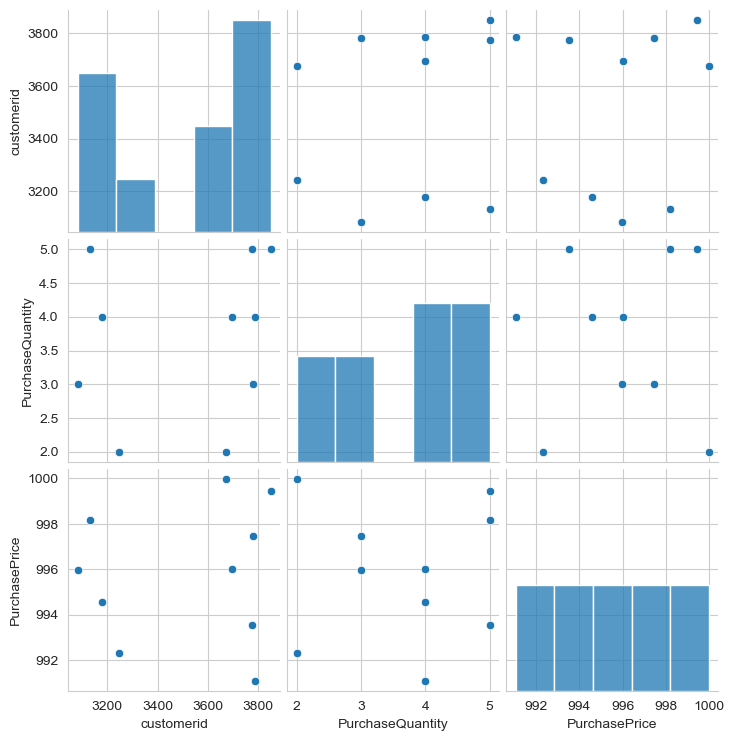

In [165]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(top_10_customers_by_customerid) 
plt.show() 

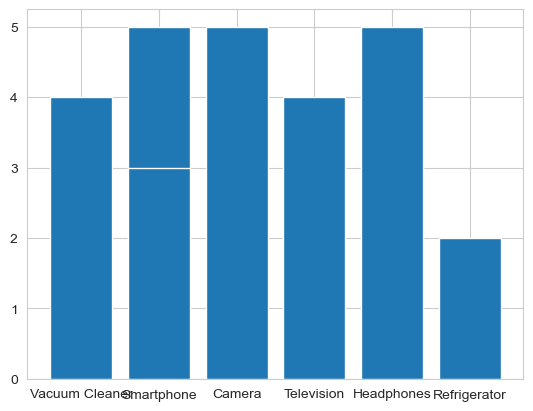

In [163]:
plt.bar(top_10_customers_by_customerid["productname"],top_10_customers_by_customerid["PurchaseQuantity"])
plt.show()

In [144]:
#purchae behaviour of customers
customer_ids_to_filter = [3674, 3850, 3132,3780,3696,3083,3177,3775,3245,3786]

# Method 1: Using .loc with boolean indexing
top_customers_purchase_behaviour = merge1.loc[merge1['customerid'].isin(customer_ids_to_filter)]
top_customers_purchase_behaviour

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID,Month,Year,Quarter,customername,country
82,5083,3,995.97,2024-03-05,3083,214,171,3,2024,2024Q1,Charles Clark,Bahamas
131,5132,5,998.17,2023-04-10,3132,203,317,4,2023,2023Q2,Mikayla Rios,United States of America
176,5177,4,994.58,2023-05-12,3177,219,284,5,2023,2023Q2,Antonio Hughes,Martinique
244,5245,2,992.33,2024-08-04,3245,211,116,8,2024,2024Q3,Steven Rivera,Burundi
673,5674,2,999.98,2024-03-21,3674,219,267,3,2024,2024Q1,Jillian Baker,Bangladesh
695,5696,4,996.01,2023-12-21,3696,206,364,12,2023,2023Q4,Jamie Montoya,Kenya
774,5775,5,993.55,2024-05-24,3775,206,456,5,2024,2024Q2,Carlos Smith,United States of America
779,5780,3,997.45,2023-07-24,3780,217,138,7,2023,2023Q3,Matthew Espinoza,Kiribati
785,5786,4,991.08,2023-09-24,3786,217,255,9,2023,2023Q3,Casey Johnson,Netherlands Antilles
849,5850,5,999.44,2023-09-26,3850,214,796,9,2023,2023Q3,Patricia Taylor,Mauritania


In [21]:
row = purchase.loc[131]
print(row)

PurchaseID                5132
PurchaseQuantity             5
PurchasePrice           998.17
PurchaseDate        04-10-2023
customerid                3132
ProductID                  203
TransactionID              317
Name: 131, dtype: object


### **Analyze purchase trends over time (monthly, quarterly, yearly)**

In [26]:
#Analyze purchase trends over time (monthly, quarterly, yearly)
purchase['Month'] = purchase['PurchaseDate'].dt.month
purchase['Year'] = purchase['PurchaseDate'].dt.year
purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID,Month,Year
0,5001,3,333.45,2024-01-01,3001,208,159,1,2024
1,5002,3,69.94,2024-01-01,3002,207,178,1,2024
2,5003,1,586.91,2024-01-01,3003,203,260,1,2024
3,5004,5,510.38,2024-01-01,3004,210,577,1,2024
4,5005,2,165.78,2024-01-01,3005,206,987,1,2024
...,...,...,...,...,...,...,...,...,...
995,5996,2,883.33,2023-10-31,3996,219,607,10,2023
996,5997,4,241.23,2023-12-31,3997,213,128,12,2023
997,5998,3,397.22,2023-12-31,3998,216,550,12,2023
998,5999,3,844.42,2023-12-31,3999,220,773,12,2023


In [27]:
monthly_sales = purchase.groupby("Month")["PurchasePrice"].sum()
monthly_sales

Month
1     45764.76
2     37800.14
3     45636.83
4     33778.98
5     42087.16
6     34683.66
7     51634.92
8     33244.68
9     36350.42
10    33568.24
11    43810.33
12    50914.60
Name: PurchasePrice, dtype: float64

<Axes: title={'center': 'Monthly Purchase Trends'}, xlabel='Month'>

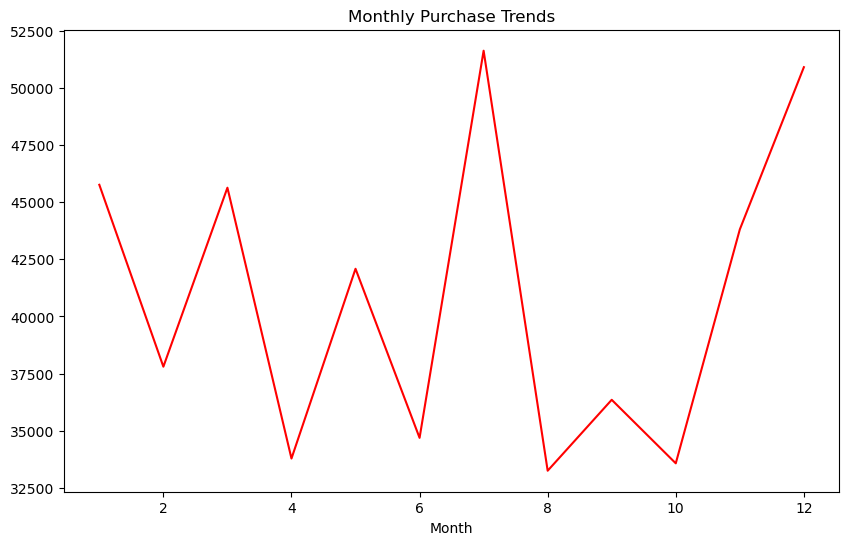

In [88]:
# Plot monthly sales trends
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Purchase Trends',color='red')

In [29]:
# Convert to quarterly periods
purchase['Quarter'] = purchase['PurchaseDate'].dt.to_period('Q')
purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID,Month,Year,Quarter
0,5001,3,333.45,2024-01-01,3001,208,159,1,2024,2024Q1
1,5002,3,69.94,2024-01-01,3002,207,178,1,2024,2024Q1
2,5003,1,586.91,2024-01-01,3003,203,260,1,2024,2024Q1
3,5004,5,510.38,2024-01-01,3004,210,577,1,2024,2024Q1
4,5005,2,165.78,2024-01-01,3005,206,987,1,2024,2024Q1
...,...,...,...,...,...,...,...,...,...,...
995,5996,2,883.33,2023-10-31,3996,219,607,10,2023,2023Q4
996,5997,4,241.23,2023-12-31,3997,213,128,12,2023,2023Q4
997,5998,3,397.22,2023-12-31,3998,216,550,12,2023,2023Q4
998,5999,3,844.42,2023-12-31,3999,220,773,12,2023,2023Q4


In [30]:
# Group by Quarter and calculate total sales
quarterly_sales = purchase.groupby('Quarter')['PurchasePrice'].sum()

<Axes: title={'center': 'Quarterly Purchase Trends'}, xlabel='Quarter'>

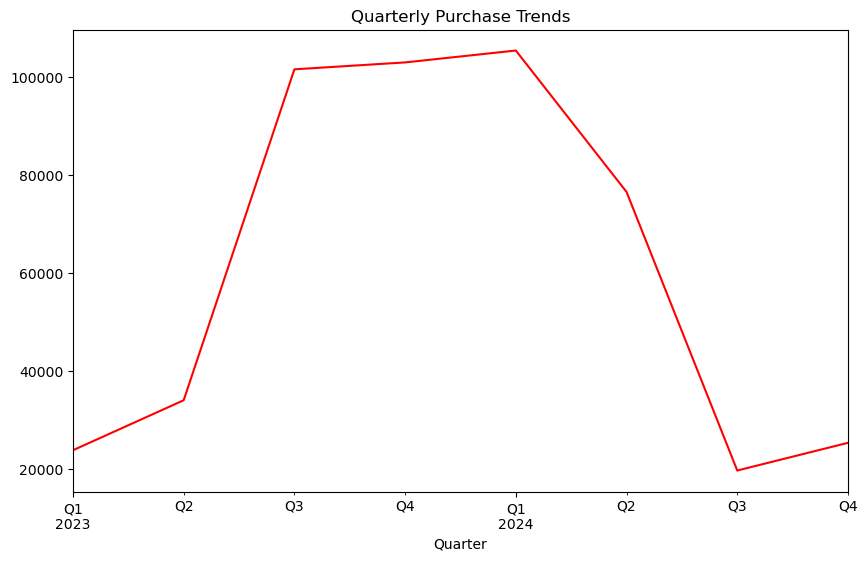

In [86]:
# Plot Quarterly sales trends
quarterly_sales.plot(kind='line', figsize=(10, 6), title='Quarterly Purchase Trends',linestyle='-',color='red')


(array([2022.8, 2023. , 2023.2, 2023.4, 2023.6, 2023.8, 2024. , 2024.2]),
 [Text(2022.8000000000002, 0, '2022.8'),
  Text(2023.0, 0, '2023.0'),
  Text(2023.2, 0, '2023.2'),
  Text(2023.4, 0, '2023.4'),
  Text(2023.6, 0, '2023.6'),
  Text(2023.8000000000002, 0, '2023.8'),
  Text(2024.0, 0, '2024.0'),
  Text(2024.2, 0, '2024.2')])

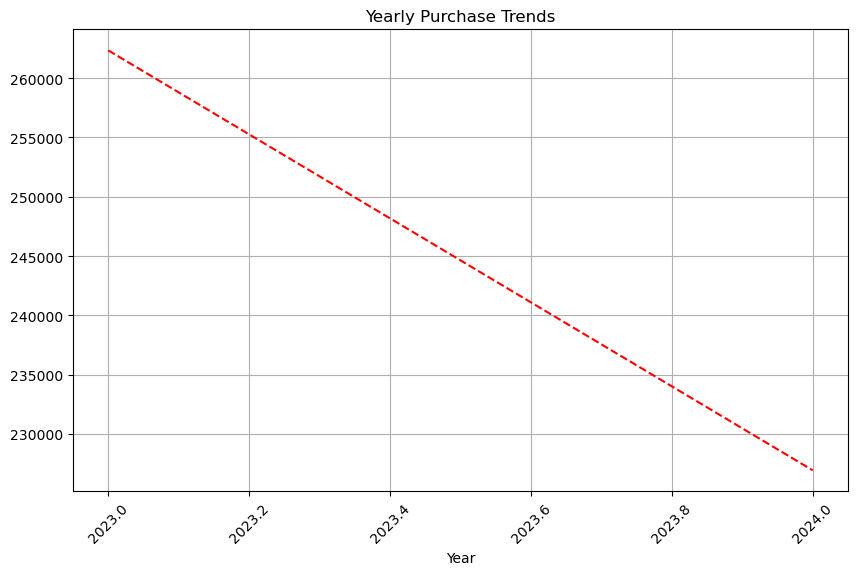

In [82]:
yearly_sales = purchase.groupby('Year')['PurchasePrice'].sum()

# Plot yearly sales trends
yearly_sales.plot(kind='line', figsize=(10, 6), title='Yearly Purchase Trends',linestyle='--',color='red')

# Add grid line

plt.grid(True)

# Rotating the xticks

plt.xticks(rotation = 45)


### **Identify the top-performing product categories.**

In [135]:
#Identify the top-performing product categories.
merge2 = pd.merge(purchase,products,left_on='ProductID', right_on='productid')
category_analysis = merge2.groupby("productcategory")["PurchasePrice"].sum()
category_analysis

productcategory
Electronics        248194.56
Home Appliances    241080.16
Name: PurchasePrice, dtype: float64

<Axes: title={'center': 'Yearly Purchase Trends'}, xlabel='productcategory'>

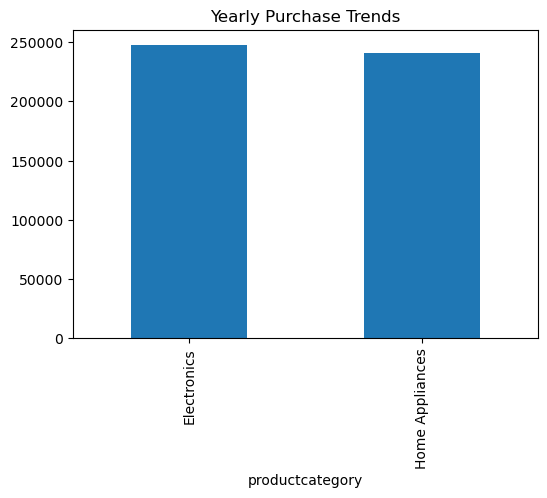

In [136]:
# category_analysis
category_analysis.plot(kind='bar', figsize=(6, 4), title='Yearly Purchase Trends')

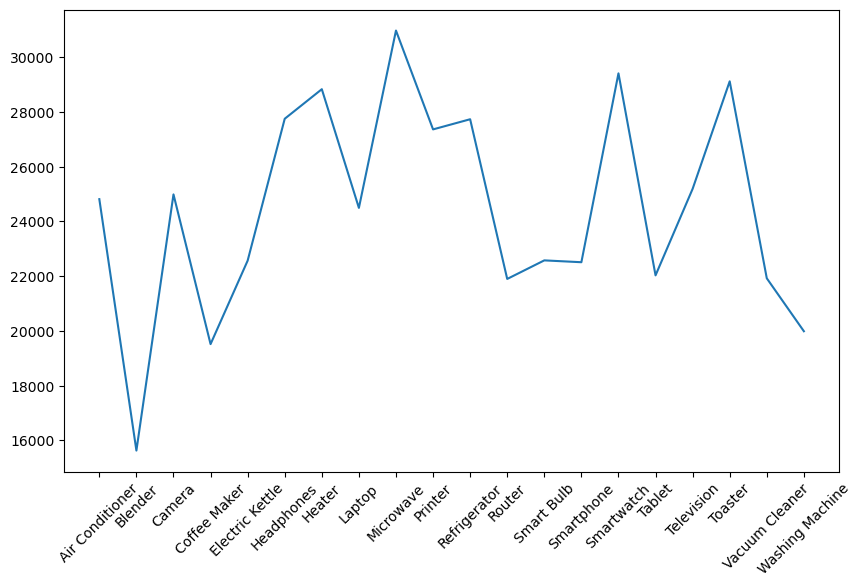

In [126]:
x=products["productname"]
y=merge_product_Purchase.groupby("productname")["PurchasePrice"].sum()
z=products["productcategory"]
plt.figure(figsize=(10, 6)) 
plt.plot(x,y)




# Rotating the xticks
plt.xticks(rotation = 45)
plt.show()

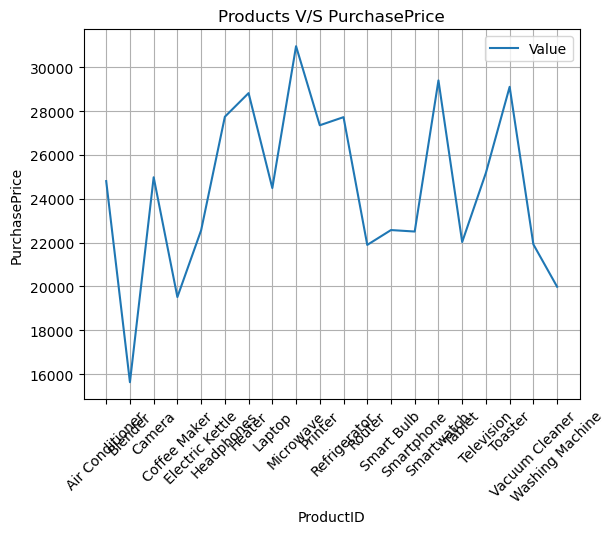

In [127]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the timeseries data
ax.plot(x,y)
# Add gridlines
ax.grid(True)
# Add a legend
ax.legend(['Value'])
# Add labels and title
ax.set_xlabel('ProductID')
ax.set_ylabel('PurchasePrice')
ax.set_title('Products V/S PurchasePrice')
# Show the plot
plt.xticks(rotation = 45)

plt.show()

In [128]:
merge_product_Purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,ProductID,TransactionID,Month,Year,Quarter,productid,productname,productcategory
0,5001,3,333.45,2024-01-01,3001,208,159,1,2024,2024Q1,208,Laptop,Electronics
1,5090,4,313.74,2023-03-08,3090,208,426,3,2023,2023Q1,208,Laptop,Electronics
2,5098,3,404.18,2023-03-10,3098,208,338,3,2023,2023Q1,208,Laptop,Electronics
3,5112,3,373.89,2024-04-03,3112,208,616,4,2024,2024Q2,208,Laptop,Electronics
4,5167,4,453.79,2023-05-08,3167,208,190,5,2023,2023Q2,208,Laptop,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5913,3,194.72,2023-07-28,3913,204,749,7,2023,2023Q3,204,Coffee Maker,Home Appliances
996,5914,4,434.74,2023-07-28,3914,204,821,7,2023,2023Q3,204,Coffee Maker,Home Appliances
997,5944,2,14.78,2023-10-29,3944,204,960,10,2023,2023Q4,204,Coffee Maker,Home Appliances
998,5977,4,295.34,2023-11-30,3977,204,107,11,2023,2023Q4,204,Coffee Maker,Home Appliances


In [194]:
purchase.to_excel('purchase.xlsx',index=False)

In [193]:
customers.to_excel('customers.xlsx',index=False)

In [192]:
products.to_excel('products.xlsx',index=False)

****
## **REPORT SUMMARY**
****

#### 1.Total Purchases Analysis ####
From the data analyzed for the years 2023 and 2024, the total revenue amounted to USD 489,274.71. The average purchase value across all transactions was $489.27.

#### 2.Based on purchase values, the top 10 customers identified are:
Jillian Baker,
Patricia Taylor,
Mikayla Rios,
Matthew Espinoza,
Jamie Montoya,
Charles Clark,
Antonio Hughes,
Carlos Smith,
Steven Rivera and
Casey Johnson.
#### 3.Purchasing Behavior Analysis
Upon analyzing the purchasing behavior of customers, it was found that the product category "Microwaves" stood out significantly. This product category recorded the highest quantity sold at 180 units, generating the highest revenue of USD 30,970.75.

#### 4.Purchase Analysis Trends Over Time

The analysis of purchase trends over time revealed that the highest revenue was generated in the 1st quarter of both years.
July emerged as the month with the highest sales figures.
Yearly revenue showed a decrease from USD 262,346.07 in  2023 to USD 226,928.65 in 2024, despite the consistent high performance in the 1st quarter of both years.
#### 5.Top-Performing Product Category
The top-performing product category identified from the analysis is "Home Appliances," which contributed the highest overall revenue of $241,080.16.